# Embeddings and Transformers
Goals of this lecture are:
* understand word embeddings
* fine-tune a BERT model for text classification 
* visualize BERT embeddings
* understand multimodal embeddings from CLIP 
* use CLIP for a image-to-text retrieval system
* implement a text-to-text retrieval system with the universal sentence encoder model

## Structure of this Notebook
In this lecture, we begin by analyzing and understanding a pre-trained word2vec model that was used in earlier modern NLP systems before transformer models were released. We still use word2vec here to get a basic understanding of how words can be represented in neural networks and why transformer models have an advantage over word2vec embeddings.

After analyzing the word2vec embeddings, we fine-tune a BERT model on the provided German news dataset and visualize the BERT embeddings to get a better understanding of the differences.

The next major step after transformers for language modeling was the CLIP model, which combines text with images. We analyze the CLIP embeddings for different datasets and get an idea of why CLIP can be used for zero-shot classification of image data without fine-tuning the model on new data. We then use the CLIP model to find for given images, suitable news messages.

In the last part of this lecture, we implement a text-to-text retrieval system by first understanding why CLIP is not well suited for text-to-text retrieval, and then using the universal sentence encoder model for retrieving text passages.

This notebook will show you how easily these models can be used with the [HuggingFace](https://huggingface.co/) and [SentenceTransformers](https://www.sbert.net/) libraries, which provide a high-level interface to the aforementioned models. This lecture is primarily about understanding the concept of embeddings rather than how to define your own architecture and train it.

First, however, we start by explaining the history and evolution of text representations for machine learning algorithms.

Reuqired libraries:
```
conda install numpy scipy
conda install scikit-learn
conda install numba
pip install umap-learn
pip install plotly
pip install 'transformers[torch]'
pip install sentence-transformers
pip install gensim
````


## Overall Picture and Evolution Path of Word Embeddings

The conventional way of modelling documents in tasks like information-retrieval, document-clustering, document-classification, sentiment-analysis, topic-classification is to represent each document as a **Bag-Of-Word**-vector $$\mathbf{d}_i=(tf_{i,0},tf_{i,1},\ldots tf_{i,|V|}).$$ Each component of this vector corresponds to a single term $j$ of the underlying vocabulary $V$ and the values $tf_{i,j}$ counts the frequency of term $j$ in document $i$. Instead of the term-frequency $tf_{i,j}$ it is also possible to fill the BoW-vector with 
* a binary indicator which indicates if the term $j$ appears in document $i$
* the tf-idf-values $$tfidf_{i,j}=tf_{i,j} \cdot log \frac{N}{df_j},$$ where $df_j$ is the frequency of documents, in which term $j$ appears, and $N$ is the total number of documents.

Independent of the values used, the BoW model represents sets of documents as 2-dimensional numeric arrays, which can easily be passed to conventional Machine Learning algorithms, such as Logistic Regression, SVM, MLPs etc. However, the major drawbacks of this approach are:
* the order by which terms appear in the document is totally ignored
* semantic relatedness of terms is not modelled
* BoW- vectors are very long and sparse 

As sketched in the picture below, today all of these drawbacks can be circumvented by representing the words of the document by their word-vectors and passing the corresponding sequence of word vectors in order to either a CNN or a Recurrent Neural Network such as LSTM or GRU. 

<img src="./Pics/overAllPicture.png" style="width:600px" align="middle">


---
## Course of Action

* Please write all executable python code in ```Code```-Cells (```Cell```->```Cell Type```->```Code```) and all Text as [Markdown](http://commonmark.org/help/) in ```Markdown```-Cells
* Describe your thinking and your decisions (where appropriate) in an extra Markdown Cell or via Python comments
* In general: discuss all your results and comment on them (are they good/bad/unexpected, could they be improved, how?, etc.). Furthermore, visualise your data (input and output).
* Write a short general conclusion at the end of the notebook
* Further experiments are encouraged. However, don't forget to comment on your reasoning.
* Use a scientific approach for all experiments (i.e. develop a hypothesis or concrete question, make observations, evaluate results)

## Submission

Upload your complete Notebook to the Ilias course until the start of the next lecture. One Notebook per group is sufficient. Edit the teammember table below.

**Important**: Also attach a HTML version of your notebook (```File```->```Download as```->```HTML```) in addition to the ```.ipynb```-File.

| Teammember |                    |
|------------|--------------------|
| 1.         | Geoffrey Hinton    |
| 2.         | Yoshua Bengio      |
| 3.         | Yann LeCun         |
| 4.         | Jürgen Schmidhuber |
---

## Part 1: Tasks on Word Embeddings

Word Embeddings for many languages can be downloaded for example from e.g. [FastText](https://fasttext.cc/docs/en/english-vectors.html). After downloading they can be imported into Python as described in [DSM.ipynb](DSM.ipynb). We use pretrained word2vec embeddings trained on [Common Crawl](https://commoncrawl.org/) and [Wikipedia](https://www.wikipedia.org/). Please download the binary model for the German language from: https://fasttext.cc/docs/en/crawl-vectors.html#models


In [ ]:
from gensim.models.fasttext import load_facebook_model

model = load_facebook_model('/home/stud/n/nw091/mounted_home/pia2023/task_2_embeddings/Data_nadine/german_word_embeddings.bin.gz')

Please explain the meaning of `CBOW`, `dimension 300`, `n-grams of length 5`, `window of size 5` and `10 negatives` that were used for training of the provided word2vec models from this sentence:

"These models were trained using CBOW with position-weights, in dimension 300, with character n-grams of length 5, a window of size 5 and 10 negatives." (adapted from https://fasttext.cc/docs/en/crawl-vectors.html)



In [ ]:
# Explanantion
CBOW

### Using Word Embeddings

#### Task 1: Meta information of the learned Word Embedding
For the word2vec-model display the following parameters:
* number of different words in the learned word2vec-model
* length of the word2vec-vectors
* context-length, applied in training the model

#### Task 2: Access Word Embeddings
Display the first 10 components of the vectors of words
* *hochschule*
* *universität*
* *anstalt*

What do you observe?

Display the words (not the word-vectors) at indices 0 to 49 of the Word-embedding. What do you observe?

### Analyse Word Similarities

#### Task 3: Most similar words
For a German word of your choice, display the 20 most similar words.

For a pair of German words of your choice, display their similarity-value.

For two sets of German words of your choice, display their similarity-value.

#### Task 4: Word Relations
Apply the Word Embedding in order to answer the following questions:
* *Mann is to König as Frau is to ?*
* *Paris is to Frankreich as Berlin is to ?*
* *Student is to Hochschule as Arbeiter is to ?*

#### Task 5: Outliers
Apply the Word Embedding in order to determine the outlier within the following set of words: *auto, motorrad, kran, essen*. 

### Visualize Word Embeddings
The following code-cell visualizes similarities of words from index 300 to 499 by transforming the high-dimensional word-vectors into a 2-dim space. The transformation is realized by [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/).

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import umap
umap_model=umap.UMAP(n_components=2,random_state=0)
model2d=umap_model.fit_transform(model.wv[model.wv.index_to_key[300:500]])


plt.figure(figsize=(19,14))
idx=0
for a in model2d[:300]:
    #w=model.wv.index2word[300+idx].decode('utf-8')
    w=model.wv.index_to_key[300+idx]
    plt.plot(a[0],a[1],'r.')
    plt.text(a[0],a[1],w)
    idx+=1
plt.show()

#### Task 6: Visualize similarities of selected target words and their neighbors
For each of the word in the list `targetwords` calculate the 10 nearest neighbors. Then apply the same procedure as in the code cell above in order to visualize the similarities between all words in `wordset`, where `wordset` contains the target words and for each target word the 10 nearest neighbors. What do you observe? 

----

## Part 2: Using Transformers for Text Classification

In recent years Transformers have received increasing attention. Therefore we use the popular [Hugging Face Framework](https://huggingface.co/docs/transformers/model_doc/bert) to fine-tune a BERT model on our custom dataset.
The classifier shall be able to distinguish RSS-feed news with technical content from general RSS-feed news. Training and evaluation data is available from the folder `./Data/GERMAN/`.

Recap BERT Lecture: [MLBook](https://maucher.pages.mi.hdm-stuttgart.de/mlbook/transformer/attention.html#bert)

Hugging Face provides thousands of different pretrained models for NLP, Visison or other tasks. They also have a [blog](https://huggingface.co/blog) and a [NLP Course](https://huggingface.co/course/chapter1/1) with Transformers.

In this task we will use a the pretrained [Bert Model from deepset.ai](https://www.deepset.ai/german-bert) that was trained for hate speech detection on the GermEval18Coarse dataset and fine-tune it on our own classification task. Hugging Face provides a tutorial for a similar task in the [documentation](https://huggingface.co/transformers/v3.2.0/custom_datasets.html#sequence-classification-with-imdb-reviews). The model name used for loading the model from the library is: `deepset/bert-base-german-cased-hatespeech-GermEval18Coarse`

First we need to install the Transformers library:

In [ ]:
!pip install transformers[torch]

In [ ]:
# check text classification models <here: https://huggingface.co/models?filter=text-classification
BERT_MODEL_NAME = "deepset/bert-base-german-cased-hatespeech-GermEval18Coarse"

We set the environment variable `WANDB_DISABLED` to true so that Hugging Face is not automatically trying to connect to a Weigths & Biases account. 

[Weights & Biases](https://wandb.ai/) is a machine learning platform for developers to build models faster. It provides tools to track experiments and datasets, evaluate model performance, reproduce models, visualize results etc.

In [ ]:
import os
import sys
os.environ["WANDB_DISABLED"] = "true"

### Access locally stored RSS-feed news of both categories 
News crawled from RSS feeds of category `Tech` and `General` are stored in distinct directories. In the following code-cell the paths to both directories are configured. 

In [ ]:
techpath="./Data/GERMAN/TECH/RSS/FeedText"
generalpath="./Data/GERMAN/GENERAL/RSS/FeedText"
catpaths=[techpath,generalpath]

The specified directory `techpath` must contain a list of directories. The name of each of these directories is the name of the feed, from which the news are crawled attached by the date of crawling. For example one subdirectory may be `golem-2017-11-07`. Each of this feed-and-date-specific subdirectories conatins one or more `.txt`-files. The name of each of these `.txt`-files is of format `hh-mm.txt`, i.e. it contains the daytime of crawling. If one feed is crawled multiple times per day, the feed-and-date-specific subdirectories will contain more than one `.txt`-files, each identified by the time of crawling. Below, the first lines of a sample `.txt`-file, `15-15.txt` from directory `golem-2017-11-07` are shown. Each paragraph of the file is a single news item from the *golem RSS feed*, crawled at 2017-11-07, 15.51h.

![Screenshot of feedfile](./Pics/feedfile.png)



In the following code-cell all news from all files are imported. All news from subdirectories of `techpath` are assigned to the class `Tech` (label 0) and all news from subdirectories of `generalpath` are assigned to class `GENERAL` (label 1). Each news-item is represented as a list of words, contained in the item. All item-specific word-lists are assigned to the list `texts` and the corresponding class-indices are assigned to the list `labels`. Before news-item specific word lists are appended to the `texts`-list it is checked, if they are not yet contained in this list.  

In [ ]:
# second, prepare text samples and their labels
print('Processing text dataset')
texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for catlabel,categorypath in enumerate(catpaths):
    for name in sorted(os.listdir(categorypath)):
        feedpath = os.path.join(categorypath, name)
        if os.path.isdir(feedpath):
            #print(name)
            for fname in sorted(os.listdir(feedpath)):
                fpath = os.path.join(feedpath, fname)
                if sys.version_info < (3,):
                    f = open(fpath)
                else:
                    f = open(fpath, encoding='utf-8')
                t = f.read()
                news=t.split('\n \n')
                for entry in news:
                    if (len(entry)>50) and (entry not in texts): #remove duplicates
                        #if entry not in texts:
                        texts.append(entry)
                        labels.append(catlabel)
                f.close()
print('Found %s texts.' % len(texts))

In [ ]:
print(texts[0])
print("-"*20)
print(texts[1])
print("-"*20)
print(texts[2])

#### Task 0: Visualize distribution of document lengths
Visualize the distribution of the number of words in all documents in a histogram.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

num_of_words = []

for text in texts:
    num_of_words.append(len(text))
    
# print(num_of_words)

# Number of words - document
plt.hist(num_of_words, bins=range(0,10))
plt.xlabel("Label of Text")
plt.ylabel("Number of words")

#### Task 1: Load the Data into a custom Dataset  

#### Convert texts to sequence of integers

Apply the [BertTokenizer](https://huggingface.co/docs/transformers/v4.16.2/en/model_doc/bert#transformers.BertTokenizer) in order to uniquely map each word to an integer-index and to represent each text (news-item) as a sequence of integers. For more information, see the [Tokenizer-chapter](https://huggingface.co/course/chapter2/4?fw=pt) in the NLP course. Afterwards we load the custom texts into a custom Dataset. Also define the `max_length` of the sequences and use padding and truncation. We first need to split the dataset into a train and test split and then apply the tokenizer on the splits. 

Then a custom Dataset can be created for training of the model. We will use a PyTorch Dataset here, as this model was trained with PyTorch and also to show that using the library with PyTorch is quite simple even though we have not used PyTorch in this course. In addition more PyTorch models are hosted on hugging face than Tensorflow models.

#### Task 2: Define the Bert Model
Next we can create a [Bert Model for Sequence Classification](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForSequenceClassification) with the pretrained weights from the previously definded `BERT_MODEL_NAME`. We can use GPU support for training the model by calling `model = model.to('cuda')` after loading the model. This is, however, not necessary as the dataset is quite small and we also do not need to train the model for many epochs. 

For training the Bert-Model on a custom task we also need to set the custom number of the labels and also the flag `ignore_mismatched_sizes` to true. The parameters which can be set are listed in the [PretrainedConfig](https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/configuration#transformers.PretrainedConfig).

#### Task 3: Define Training Arguments and train the Model
Hyperparameters for training a Hugging face Transformer Model are defined in a [TrainingArguments](https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/trainer#transformers.TrainingArguments)-Object. We can mostly use the default arguments, but choose an appropriate batch size. Two epochs is already enough for finetuning of the model.

Additonally, we set the `evaluation_strategy`and `save_strategy` to `epoch` to make the model predicitons comparable with the CNN and LSTM-architecture. You also need to define a suitable value for `logging_steps`. This value should be smaller than the steps needed to complete an epoch as otherwise no values will be logged in the first epochs.

Now we instantiate a [Trainer](https://huggingface.co/transformers/v3.2.0/main_classes/trainer.html#transformers.Trainer) with the defined model, training arguments and both datasets: 

Finally we can train the model:

#### Task 4: Add an Evaluation Metric while Training the Model
As you should have already noticed, by default Hugging Face returns only loss and no other metrics. To get metrics for our training epochs, we should set the `compute_metrics` parameter of the Trainer. Define a function with the approriate metrics so that you can compare your metrics to the previous models. An example of a compute metrics function can be found [here](https://huggingface.co/transformers/v3.0.2/training.html#trainer).

Then retrain your model and interpret the training results.

# Part 3: Visualize BERT embeddings

#### Task 1: Bert for Inference and compare example Sentences
After the model is trained, we can visualize the embeddings for the dataset and use the model for inference. For getting the hidden states of the model prediciton, you have to pass `output_hidden_states=True` to the forward/call method of the model. Additionally, you can pass `return_dict=True` to get a [BaseModelOutput](https://huggingface.co/docs/transformers/v4.27.2/en/main_classes/output#transformers.modeling_outputs.BaseModelOutput)-object, where you can then access the `last_hidden_state`-attribute.  

To understand the difference of the embeddings, you can use two example sentences where one word in the middle differs and compare the embeddings of both sentences. 
For comparing the two example sentences use `torch.isclose(first_sentence, second_sentence, atol=1e-05)` [Doc](https://pytorch.org/docs/stable/generated/torch.isclose.html). The `atol` parameter controls which numerical precision satsifies the `isclose` condition.

What can you observe in contrast to the word2vec embeddings? What is the main difference? 

#### Task 2: Create Embeddings for whole Dataset

Now we can create the embeddings for the entire dataset. Store the embeddings in a list so that we can visualize the embedding space. We need to use a dimensional reduction method like UMAP, which was used previously to visualize the word2vec embeddings. Average the embeddings over the first dimension so that we get a 2-dimensional tensor with `(number of texts, size of bert embedding)`.

For visualization, we can use a [Plotly scatter plot](https://plotly.com/python/line-and-scatter/). To analyze which sentences are close to each other in the embedding space, set the news text as hover data. Display only the first 100 characters of the news article, otherwise the hover box will be to large.

# Part 4: Visualize CLIP embeddings

This part was inpsired by: https://medium.com/mlearning-ai/having-fun-with-clip-features-part-i-29dff92bbbcd

After covering the differences of the transformer and word2vec embeddings, we will analyze the multimodal embeddings generated from the [OpenAI CLIP](https://openai.com/research/clip). Unlike GPT-4 the CLIP model was still released open source with pretrainend weights. We will use the pretrained weights, so we do not need to finetune the model. 

The main goal of this chapter is to understand why CLIP can be used for zero-shot classification on image datasets. Therefore, we analyze two different datasets, [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) and the good old [MNIST](https://paperswithcode.com/dataset/mnist) dataset. 


## CLIP Overview
CLIP, Contrastive Language-Image Pre-training, was trained on over 400M image and text pairs collected from publicly available resources on the internet. A text-image pair consists of the image and a caption. You can think of the caption as the description of the image, such as when someone uploads a picture to Instagram and briefly describes what she/he is doing. 

<img src="Pics/clip-training.svg" width=500 />
The figure above shows an overview of the training objective. During training, CLIP is incentivized to match each image in the current batch to the correct caption. Then the loss for both encoders is calculated and backpropagated. This pushes the representation ob both encoders onto a common latent space. All other examples in the current batch are negative examples, as the caption doesn't fit to the image. This is called contrastive learning. The goal of contrastive learning is to learn representations in which the embeddings of similar instances are close to each other, while different instances are further away. 

For using CLIP in a zero-shot way to classify datasets, we generate text prompts for all classes in the style of `a photo of a {class_name}`. Then embeddings are created for all images and text prompts. To classify which image belongs to which class, the cosine similarity between the text prompts and image embeddings is calculated and the text prompt with the highest similarity is selected. See also the following image:
<img src="Pics/clip-overview.svg" width=500 />
(both pictures from https://openai.com/research/clip)

## Projection onto the same embedding space
We will use UMAP again for dimensional reduction. Unlike the visualization of the BERT and word2vec embeddings, CLIP consists of two different encoders, one for the image and one for the text. UMAP is able to map the embedding spaces of both encoders onto the same embedding space by first fitting and transforming the embedding space of the image dataset, and then using the fitted UMAP model to map the text embedding space onto the image embedding space. 

We will provide a function for plotting the text prompts into the embedding space, as this is a bit more complicated, to get matching colors for the text prompts and the labels of the images. It is also necessary to sort the image embeddings by the labels, before plotting the data. This ensures, that we can match the colors of the text prompts and the images. 

From now on we will also use the [SentenceTransformers](https://www.sbert.net/) library, which is another abstraction of the HuggingFace library and thus also easier to use. For further information on how to use CLIP with the SentenceTransformer library, see the [docs](https://www.sbert.net/examples/applications/image-search/README.html).

The CLIP model can be loaded with the name `clip-ViT-B-32`.


In [1]:
from sentence_transformers import SentenceTransformer

# Load CLIP model (Non-Multilingual)
model = SentenceTransformer('clip-ViT-B-32')

# There is a warning as output, but it works anyway

/opt/miniconda3/envs/python3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-20 10:55:19.953463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 10:55:21.442222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
# Installing huggigface datasets and adjusting to warnings
# !pip install datasets
# !pip install --force-reinstall charset-normalizer==3.1.0

# Load Embeddings from HuggingFace
from datasets import load_dataset
dataset_mnist = load_dataset("mnist")
dataset_cifar10 = load_dataset("cifar10")

Found cached dataset mnist (/home/stud/n/nw091/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)
100%|██████████| 2/2 [00:00<00:00, 207.38it/s]
Found cached dataset cifar10 (/home/stud/n/nw091/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)
100%|██████████| 2/2 [00:00<00:00, 305.75it/s]


In [35]:
# print(dataset_cifar10.__dict__) -> Output: {}

dataset_cifar10['train'][:1280]
print(len(dataset_cifar10))
print(dataset_cifar10)

# Ouput of first image
dataset_cifar10['train'][0]['label']
    

2
DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


0

In [49]:
# Convert label number to string
dataset_cifar10['train'][0]['label']

dataset_cifar10['train'].features['label'].names

class
# tokenized_batch["labels"] = [str_to_int[label] for label in batch["labels"]]

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
import plotly.express as px
import umap
import pandas as pd

"""
This function plots the low dimensional text prompts embeddings 
onto the same figure with a x marker to distinguish them from the image embeddings

Parameters:
    low_dim_text_embeddings: the 2-dimensional text prompt embeddings after the UMAP transform
    figure: the plotly figure, returned by the px.scatter function
    classes: the sorted classes of the dataset
"""
def plot_text_prompt_embeddings(low_dim_text_embeddings, figure, classes):
    l, c = len(px.colors.qualitative.Plotly), len(low_dim_text_embeddings)
    df, colors = pd.DataFrame(low_dim_text_embeddings), (px.colors.qualitative.Plotly * ((c // l) + 1))[:c]
    figure.add_scatter(x=df[0], y=df[1], hovertext=classes, mode='markers', marker={'symbol':
                   'x', 'size':20, 'color': colors, 'opacity':0.8, 'line': dict(width=2, color="DarkSlateGrey")})


"""
This function should load a dataset with a given name from the HuggingFace datasets
and create the embeddings for the images and class labels.
You need to create the automatic text prompts in the style of "a photo of a {class_name}" for each class.

It is also sufficient to plot a large enough subset of the data. 
n=1280 is already good enough to see, how the embedding space is clustered.
It could be that the keys in which the images are stored are not always the same.

Parameters:
    name: the name of the dataset, e.g. 'cifar10' or 'mnist'
    n: the number of images for which embeddings should be created.
    
Return: image embeddings, text embeddings, labels 
"""
def load_embeddings_for_dataset(name, n=1280):c
    # Load Embeddings from HuggingFace
    from datasets import load_dataset
    dataset_mnist = load_dataset("mnist")
    dataset_cifar10 = load_dataset("cifar10")
    
    dataset_cifar10.__dict__
    
    # check if the embeddings were already created
    if os.path.exists('img_emb_file') and os.path.exists('text_emb_file'):
        pass
         
    else:
        # create new embeddings for the text prompts and images
        use_precomputed_embeddings = True
        
        # if use_precomputed_embeddings:
            # class_name = '
        print("a photo of a {class_name}")
        
        
        # Embeddings in zwei Schritten
        # TODO embeddings = model.encode(sentences)

        # TODO
        img_names = list(glob.glob('photos/*.jpg'))
        print("Images:", len(img_names))
        img_emb = img_model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

        # and store them on the disk so that we not always need to calculate the embeddings
        pass
        
    return # image embeddings, text embeddings, labels 


"""
This function transforms the data so that we can plot them. 
First, use UMAP to reduce the embeddings into 2 dimensions.
Then use px.scatter to plot the image embeddings, use the class labels as the color of the data point.

Parameters:
    img_embeddings: the image embeddings from the CLIP model
    text_embeddings: the text embeddings from teh CLIP model
    labels: the labels for the images
"""
def plot_embeddings(img_embeddings, text_embeddings, labels):
    # use UMAP to reduce the dimensionality of the image data
    # ToDo: So ähnlich:
    # umap_model=umap.UMAP(n_components=2,random_state=0)
    # model2d=umap_model.fit_transform(model.wv[model.wv.index_to_key[300:500]])
    
    # plot the low dim data

    #plot_text_prompt_embeddings(low_dim_text_embeddings, fig, classes)

    #fig.show()
    pass    

### Task 1: CIFAR10 Dataset

The evaluation of the CIFAR10 dataset. Can you draw some conclusions about CLIP and the dataset?

<font color="blue"><b>Conclusion:</b></font>
CLIP seems like an efficient way of learning deep connections between image representation and matching text. The contrastive learning approach therefore is approachable.

### Task 2: MNIST dataset
The evaluation of the MNIST dataset. Can you draw some conclusions about CLIP and the dataset?

<font color="blue"><b>Conclusion:</b></font>

In [ ]:
- Not as good as CIFAR10
    - Latent space is clustered (single cluster for each class)
- It seems like the pairs that the black and white images of MNIST 

### Task 3: Custom Dataset

After analyzing the CIFAR10 and MNIST dataset, perform the same evaluation on a dataset of your choice. 

In [ ]:
CIFAR-100? --> 100 classes instead of 10; number suffix refers to the number of classes / categories
Fashion MNIST: still only 10 labels. The more labels, the more
Imagenet
PASCAL
VOC
COCO

# Part 5: Text and Image Retrieval System

In this section, we will use CLIP to match images to news articles. Therefore, we need to create text embeddigs for the whole dataset. As we are working with German news articles, we have to use the multilingual version of CLIP with the model name `clip-ViT-B-32-multilingual-v1` for encoding the text. For the images, we still use the same model as before `clip-ViT-B-32`. For this notebook, it is not necessary to understand the details of how the CLIP text encoder was adapted to more languages, but if this topic is of interest, you can read the paper here: [Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation](https://arxiv.org/abs/2004.09813)

As an side experiment, we will also try to use CLIP for text-to-text retrieval and check if it is possible to use CLIP for zero-shot text classification.

### Task 1: Create embeddings for all news articels with the CLIP text encoder

The maximum sequence length of the CLIP text encoder is unfortunately not very long, but we can simply truncate the news article to the first 170 characters so that the text encoder can create embeddings for all articles.

In [ ]:
# Here we load the multilingual CLIP model. Note, this model can only encode text.
# If you need embeddings for images, you must load the 'clip-ViT-B-32' model
text_encoder = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

### Task 2: Match News Articles to Images

Define a function `show_news_for_img(img_path, topk=5)`, which takes an image path as input and an integer `topk` that defines how many of the best matching news articles should be displayed. For evaluation, you can select some example images (minimum 5) from [Unsplash](https://unsplash.com/) and analyze how good the best 5 news articles match to the image.

The function should always display the image and afterwards the topk news articles and the similarity of the news article and image.

For calculating which news article fits best to an image, use the [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) metric provided from Scikit-learn. 

### Task 3: CLIP for zero-shot text classification

In this experiment, analyze how good CLIP is for zero-shot text classification.
Use `class_prompts = ['Dies ist ein Technischer Text', 'Dies ist ein Genereller Text']` as the zero-shot class text prompts to assign the news articles to one of the two categories.

Then calculate the cosine similarity between the news articles and the text and check which class has the higher similarity. Calculate the accuracy of the zero-shot text classifier. How do you interpret the results?


### Task 4: CLIP for text-to-text retrieval

Define a function `show_news_for_keywords(keywords, topk=5)`, which takes a string as input and an integer topk that defines how many of the best matching news articles should be displayed. For evaluation, try out some different keywords such as `Sport Fußball` or `Donald Trump` and interpret the best matching news articles. What final conclusions can you draw about the CLIP model? Why do you think CLIP shows this kind of behavior? 

The function should always display the keywords and then the top news articles, as well as the similarity of the news article to the keywords.

### Bonus: Image-to-image retrieval with CLIP

As an bonus experiment you can test, how good CLIP is for image-to-image retrieval. This should be straightforward to implement, since you already know, how to use clip for image-to-text and text-to-text retrieval. 

What hypothesis do you have regarding the performance of CLIP's image-to-image capabilities? 

# Part 6: Semantic Search with only text-based model

In the final experiment, we will use the [Multilingual Universal Sentence Encoder for Semantic Retrieval](https://ai.googleblog.com/2019/07/multilingual-universal-sentence-encoder.html) model for text-to-text retrieval. 
The model name is `distiluse-base-multilingual-cased-v1`.

CLIP uses one image and one text encoder to link text and images. In contrast this model uses a shared text encoder as it only computes embeddings for text passages. Instead of image-text pairs, we have text-text pairs, where one text is a paragraph (similar to the image) and the other text is similar to the caption. The model is trained in a multi-task setting. The following picture shows the training objectives for each task. All tasks receive two text segments as input and in addition, the question answering and translation tasks have almost the same objective as CLIP, which is to match one text block to another text block. 

<img src="Pics/use-model.png" width=500 />
(img src: https://ai.googleblog.com/2019/07/multilingual-universal-sentence-encoder.html)

Recalculate the text embeddings for all news articles with the new model. Then perform the same experiments as in part 5 task 3 and task 4. It should be possible to use the same method `show_news_for_keywords(keywords, topk=5)` as in the previous experiment.

Interpret the accuracy of the zero-shot text classification experiment compared to the experiment before? 
How good is the news article retrieval system for the same keywords as in part 5 task 4?

In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Further ideas

#### This is not part of the official notebook!!! 

This was part of the old notebook, where LSTM and CNN models were trained on top of the word2vec-embeddings for text classification and can be used for further experiments/ideas. 

## Tasks on Text Classification

In this section a CNN document classifier shall be defined, trained and evaluated with Keras. For this the basics of Keras, as described e.g. in this [Keras Tutorial](https://keras.io/about/), must be known. 

The classifier shall be able to distinguish RSS-feed news with technical content from general RSS-feed news. Training and evaluation data is available from the folder `./Data/GERMAN/`.  

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import sklearn
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

print(f"Tensorflow version: {tf.__version__} | Keras version: {keras.__version__}")

2023-04-24 16:17:17.112412: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 16:17:17.685486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 16:17:17.687403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 16:17:19.708968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow version: 2.12.0 | Keras version: 2.12.0


In [6]:
# Reading a test file
#df = pd.read_csv('Data/GERMAN/TECH/RSS/FeedText/computerbild-2017-09-29/12-13.txt')
#print(df.shape)
#df.describe()

### Access locally stored RSS-feed news of both categories 
News crawled from RSS feeds of category `Tech` and `General` are stored in distinct directories. In the following code-cell the paths to both directories are configured. 

In [7]:
techpath="./Data/GERMAN/TECH/RSS/FeedText"
generalpath="./Data/GERMAN/GENERAL/RSS/FeedText"
catpaths=[techpath,generalpath]

The specified directory `techpath` must contain a list of directories. The name of each of these directories is the name of the feed, from which the news are crawled attached by the date of crawling. For example one subdirectory may be `golem-2017-11-07`. Each of this feed-and-date-specific subdirectories contains one or more `.txt`-files. The name of each of these `.txt`-files is of format `hh-mm.txt`, i.e. it contains the daytime of crawling. If one feed is crawled multiple times per day, the feed-and-date-specific subdirectories will contain more than one `.txt`-files, each identified by the time of crawling. Below, the first lines of a sample `.txt`-file, `15-15.txt` from directory `golem-2017-11-07` are shown. Each paragraph of the file is a single news item from the *golem RSS feed*, crawled at 2017-11-07, 15.51h.

![Screenshot of feedfile](./Pics/feedfile.png)



In the following code-cell all news from all files are imported. All news from subdirectories of `techpath` are assigned to the class `Tech` (label 0) and all news from subdirectories of `generalpath` are assigned to class `GENERAL` (label 1). Each news-item is represented as a list of words, contained in the item. All item-specific word-lists are assigned to the list `texts` and the corresponding class-indices are assigned to the list `labels`. Before news-item specific word lists are appended to the `texts`-list it is checked, if they are not yet contained in this list.  

In [9]:
# second, prepare text samples and their labels
print('Processing text dataset')
texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for catlabel,categorypath in enumerate(catpaths):
    for name in sorted(os.listdir(categorypath)):
        feedpath = os.path.join(categorypath, name)
        if os.path.isdir(feedpath):
            #print(name)
            for fname in sorted(os.listdir(feedpath)):
                fpath = os.path.join(feedpath, fname)
                if sys.version_info < (3,):
                    f = open(fpath)
                else:
                    f = open(fpath, encoding='utf-8')
                t = f.read()
                news=t.split('\n \n')
                for entry in news:
                    if (len(entry)>50) and (entry not in texts): #remove duplicates
                        #if entry not in texts:
                        texts.append(entry)
                        labels.append(catlabel)
                f.close()
print('Found %s texts.' % len(texts))

Processing text dataset
Found 3315 texts.


In [10]:
print(texts[0])
print("-"*20)
print(texts[1])
print("-"*20)
print(texts[2])

Gestaltungstipps: T-Shirts bedrucken
Bedruckte T-Shirts sind ein All-Time-Favorite – egal, ob witzige Comic-Motive oder schlichte Formen. Tipps und Ideen rund um die Gestaltung.
--------------------
Software-Charts: Die 50 Top-Downloads des Monats
CCleaner ist gehackt, die sichere neue Fassung laden Sie hier – samt Vollversionen: das Ashampoo Music Studio und PowerDirector.
--------------------
Quereinsteiger-Jobs: So gelingt der Wechsel
Der Quereinstieg in eine neue Branche ist heute nicht mehr ungewöhnlich. Fragen und Tipps, die beim beruflichen Neustart helfen können.


### Convert texts to sequence of integers

#### Task 10: Transform each text into a sequence of integers
Apply the [Keras Tokenizer class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) in order to uniquely map each word to an integer-index and to represent each text (news-item) as a sequence of integers. The maximum number of words regarded in the Tokenizer shall be `MAX_NB_WORDS=10000`. After fitting the `Tokenizer`-object with the available texts (`fit_on_texts()`), it's attribute `tokenizer.word_index` maps each word to an integer-index. 

In [35]:
word_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

word_tokenizer.fit_on_texts(texts)
indicies = word_tokenizer.word_index

# Examples
print(f"There are {len(indicies)} mappings of words to an integer index.")
# first10values = {k: indicies[k] for k in sorted(indicies.keys())[:20]}
print(f"The word 'und' can be found on index {indicies['und']}.")
print(indicies.get('und'))

# This is wrong, this should list the key-value pairs. What did I do wrong?
for key, value in indicies.items():
    if value == 'und':
        print(key)   

#print(indicies)

# Checking the created tokens
# for i, token in enumerate(indicies[10][:10]):
    # print(token, "=", tokenizer.decode([token]))

There are 20652 mappings of words to an integer index.
The word 'und' can be found on index 3.
3


#### Task 11: Visualize distribution of document lengths
Visualize the distribution of document lengths in a histogram.

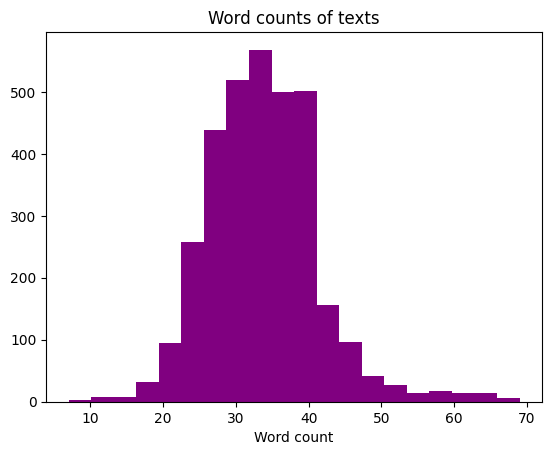

In [13]:
from matplotlib import pyplot as plt

lengths = [len(text.replace("-", "").split(" ")) for text in texts]
plt.hist(lengths, bins=20, color="purple")
plt.title("Word counts of texts")
plt.xlabel("Word count")
plt.show()

#### Task 12: Pad sequences to unique length
Next the [Keras function pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) shall be applied to represent the set of all sequences as a numpy-array. The number of rows in this array is the number of sequences, the number of columns is the fixed sequence length `maxlen`. Choose an appropriate value for the fixed sequence length. 

Moreover, the labels-list shall be one-hot-encoded into a numpy-array `labels` with two columns. In this array the entry in row i, column j is 1, if the i.th text belongs to the class with label j, otherwise this entry is 0.

In [42]:
len(labels)

3315

In [43]:
#tf.keras.utils.pad_sequences(indicies, maxlen=1000)

sequences = word_tokenizer.texts_to_sequences(texts)
tf.keras.utils.pad_sequences(sequences, maxlen=60)

# ToDo: Zweiter Satz verstehen

array([[   0,    0,    0, ...,   43,    1, 8919],
       [   0,    0,    0, ..., 2720,    3, 8925],
       [   0,    0,    0, ..., 4137,  601,   76],
       ...,
       [   0,    0,    0, ...,    7,  310, 2507],
       [   0,    0,    0, ...,   53,   88,   52],
       [   0,    0,    0, ..., 1513,   12,  138]], dtype=int32)

<font color="blue"><b>Comment:</b></font> For the value of fixed sequence length a maxlength of 60 was chosen, as around 90% of texts ha size that long. Because most of these texts have

### Split labeled texts in training- and validation set

#### Task 13: Create training- and validation-partition
The numpy-array of padded integer-sequences and the corresponding labels (as generated in the code cell above) shall be randomly shuffled and then split into a training- and a validation set. 80% of the labeled data is applied for training, the remaining 20% for validation. 

### Load  and prepare Word-Embedding

#### Task 14: Load Word Embedding
Load the Word Embedding, which has been trained and saved in task 3.

#### Task 15: Prepare `embeddings_index`
Next a Python dictionary `embeddings_index`, which maps words to their vector-representation must be generated.

#### Task 16:  Prepare `embeddings_matrix`

The variable `word_index` has been allocated in **Task 10**. It maps each word of the labeled documents (news) to a unique index. Now `word_index` as calculated from the labeled input documents for the classifier is combined with the `embedding_index`, which maps each word of the word-embedding (German wikipedia dump in this case) to it's vector representation. The result is the *numpy-array* `embedding_matrix`, which contains in the i.th row the vector representation of the word with index i in the `word_index`. Applying this `embedding_matrix` allows the *Keras*-module `Embedding` to map a sequence of word-indices, which represents a single news-item, to a sequence of word-vectors. 

![wordMappings](./Pics/wordMappings.png)



### Define CNN architecture, train and evaluate
In Keras network architectures can either be defined as [Sequential models](https://keras.io/guides/sequential_model/) or by the [Functional API approach](https://keras.io/guides/functional_api/). For the implementations in this lecture you are free to choose any of both. 

#### Task 17: Define CNN architecture
The `embedding_matrix`, as generated in the previous task shall now be assigned to the `weights`-argument of a [Keras Embedding Layer](https://keras.io/api/layers/core_layers/embedding/). The Embedding Layer constitutes the input layer of the CNN. 

Following the input layer configure one or more cascades of `Conv1D`-layers, followed by `MaxPooling1D`-layers. Apply `relu`-activation in the conv-layers. 


After the last convolutional-layer a `GlobalMaxPooling1D`-layer shall be applied, followed by a dense layer with softmax-activation (for the binary classification actually a sigmoid-activation at the output would be enough).

Display a summary of this architecture by calling the `summary()`-function.

#### Task 18: Define Training
Hyperparameters for training a Keras model are defined by applying the `compile()`-method. Use `binary_crossentropy` as loss-function, `rmsprop` as learning-algorithm (optimizer) and `accuracy` as metric. 

#### Task 19:  Training and Validation
Apply the model's `fit()`-method for training. Assign training- and validation- data as generated in Task 13. Choose an appropriate `batch_size` and an appropriate number of `epochs`. 

After training is finished, plot the accuracy on the training- and validation-data over the epochs.

### Optimization
#### Task 20: Optimize CNN Architecture
Find a good CNN configuration by varying hyperparameters, such as number of layers, number of filters, filtersizes, etc. 


## Further ideas
If no embedding_matrix is assigned to the `weights`-argument of the `EmbeddingLayer` and the `trainable`-argument is set to be `True`, then the weights of the EmbeddingLayer are learned during training of the entire network. I.e. in this case no pre-trained word-embedding is required. It would be nice to compare this approach with the approach where pre-trained weights are applied. 

As an alternative to the CNN a LSTM-architecture, e.g. a single LSTM-Layer, followed by Dropout and a Dense Layer at the output, can be applied for classification. The input-embedding layer would be the same as for the CNN. 